In [1]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import lightgbm

In [2]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
# lightgbm:y.shape=(num, )
y_train.shape

(2250,)

In [4]:
eval_set = [(X_train, y_train),
            (X_test, y_test)]
lgb = LGBMClassifier(n_jobs=-1)

# Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and logloss for classification, mean average precision for ranking)
# eval_metric可选参数
# 可自定义
'''
l1:absolute loss
l2:square loss
rmse:root square loss
cross_entropy
multi_error:error rate for multi-class classification
multi_logloss:log loss for multi-class classification
binary_logloss
auc
'''
lgb.fit(X_train, y_train,
        early_stopping_rounds=20,  # ==>xgboost
        verbose=5,  # ==>xgboost
        eval_set=eval_set,  # ==>xgboost
        eval_metric=['multi_error', 'multi_logloss']  # ==>xgboost
        )

result = lgb.predict(X_test)
result

Training until validation scores don't improve for 20 rounds
[5]	training's multi_error: 0.111111	training's multi_logloss: 0.798485	valid_1's multi_error: 0.237333	valid_1's multi_logloss: 0.918015
[10]	training's multi_error: 0.0813333	training's multi_logloss: 0.493645	valid_1's multi_error: 0.208	valid_1's multi_logloss: 0.673587
[15]	training's multi_error: 0.0573333	training's multi_logloss: 0.3316	valid_1's multi_error: 0.186667	valid_1's multi_logloss: 0.55527
[20]	training's multi_error: 0.0333333	training's multi_logloss: 0.237362	valid_1's multi_error: 0.172	valid_1's multi_logloss: 0.493376
[25]	training's multi_error: 0.0222222	training's multi_logloss: 0.175426	valid_1's multi_error: 0.165333	valid_1's multi_logloss: 0.458235
[30]	training's multi_error: 0.0124444	training's multi_logloss: 0.133678	valid_1's multi_error: 0.158667	valid_1's multi_logloss: 0.439083
[35]	training's multi_error: 0.00666667	training's multi_logloss: 0.103719	valid_1's multi_error: 0.161333	val

array([3, 1, 2, 1, 3, 5, 5, 5, 2, 6, 6, 6, 2, 2, 2, 2, 5, 7, 2, 2, 5, 5,
       4, 2, 5, 1, 2, 6, 2, 2, 2, 6, 6, 4, 3, 3, 5, 2, 7, 3, 2, 1, 1, 2,
       2, 5, 1, 2, 2, 5, 6, 2, 5, 7, 5, 7, 1, 1, 1, 5, 5, 1, 5, 7, 5, 2,
       5, 1, 3, 5, 5, 7, 2, 1, 5, 5, 5, 5, 2, 6, 2, 4, 5, 1, 1, 6, 5, 6,
       2, 5, 5, 7, 1, 2, 2, 5, 1, 1, 1, 1, 6, 5, 5, 1, 1, 1, 7, 5, 5, 1,
       6, 5, 1, 2, 6, 1, 5, 1, 2, 2, 5, 6, 5, 2, 2, 7, 4, 2, 5, 2, 5, 2,
       2, 2, 2, 5, 5, 2, 2, 4, 2, 3, 5, 4, 5, 2, 3, 1, 2, 2, 2, 6, 3, 1,
       2, 2, 1, 4, 1, 6, 5, 7, 2, 3, 2, 7, 1, 5, 2, 1, 3, 4, 5, 2, 5, 5,
       1, 1, 2, 2, 1, 5, 3, 3, 6, 5, 6, 1, 6, 5, 2, 1, 2, 1, 3, 6, 1, 1,
       2, 5, 2, 1, 7, 5, 5, 1, 2, 5, 2, 2, 2, 5, 1, 6, 5, 6, 1, 2, 5, 4,
       5, 6, 2, 7, 2, 5, 5, 2, 5, 1, 5, 2, 1, 5, 5, 2, 5, 5, 2, 3, 2, 2,
       6, 5, 5, 2, 7, 6, 5, 5, 2, 2, 5, 1, 7, 6, 4, 2, 5, 2, 5, 6, 2, 1,
       1, 2, 5, 2, 3, 4, 7, 5, 1, 7, 6, 5, 3, 1, 2, 2, 5, 2, 5, 1, 5, 2,
       2, 2, 3, 3, 3, 1, 6, 5, 5, 2, 3, 2, 7, 5, 2,

In [5]:
# lightgbm:predict_result.shape=(num, )
result.shape

(750,)

In [6]:
# 预测结果可以输出为概率向量
result_pro = lgb.predict_proba(X_test)  # 仅分类算法
result_pro

array([[4.98225865e-03, 7.80385406e-03, 8.21767978e-01, ...,
        6.22878542e-03, 1.46897753e-01, 1.19094090e-03],
       [9.67288601e-01, 1.79681080e-02, 1.70625757e-03, ...,
        4.69065030e-03, 2.19308545e-03, 5.12785136e-03],
       [7.59867554e-03, 6.75453750e-01, 1.37870282e-03, ...,
        2.36282706e-01, 7.77272091e-02, 7.29763224e-04],
       ...,
       [1.57495477e-02, 9.78322175e-01, 8.93702229e-04, ...,
        2.88992180e-03, 1.13895577e-03, 4.70488348e-04],
       [3.78805001e-03, 3.12003703e-02, 4.41273010e-02, ...,
        4.73579402e-03, 9.14219729e-01, 9.03413848e-04],
       [3.19690667e-04, 2.18706763e-03, 1.45973462e-04, ...,
        9.96997252e-01, 1.86067459e-04, 7.67503350e-05]])

In [7]:
result_pro.shape

(750, 7)

In [8]:
lgb.score(X_test, y_test)  # 精度

0.8413333333333334

In [9]:
lgb.feature_importances_  # 特征的相对重要性

array([1555,  482,  322,  668,  480, 1308,  523,  460,  535, 1162,  101,
          0,   23,   90,   52,    9,    0,    0,    6,    0,    0,    0,
          0,   29,    0,  127,   21,    0,    0,    0,   21,    1,    3,
        115,    0,    9,   32,    3,    0,    0,    0,    0,  104,   71,
          0,   13,    6,    0,    0,    0,    0,    0,   14,    0])

In [10]:
evals_result = lgb.evals_result_  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'training': OrderedDict([('multi_error',
               [0.4106666666666667,
                0.24,
                0.16844444444444445,
                0.13244444444444445,
                0.1111111111111111,
                0.108,
                0.09555555555555556,
                0.09333333333333334,
                0.08577777777777777,
                0.08133333333333333,
                0.07466666666666667,
                0.06977777777777777,
                0.06488888888888888,
                0.06177777777777778,
                0.05733333333333333,
                0.05333333333333334,
                0.04844444444444444,
                0.04088888888888889,
                0.03822222222222222,
                0.03333333333333333,
                0.032,
                0.032,
                0.028,
                0.025777777777777778,
                0.022222222222222223,
                0.02,
                0.01911111111111111,
                0.016444444444444446,
       

In [11]:
train_evals = evals_result['training']['multi_logloss']
test_evals = evals_result['valid_1']['multi_logloss']

Text(0.5, 0, 'rounds')

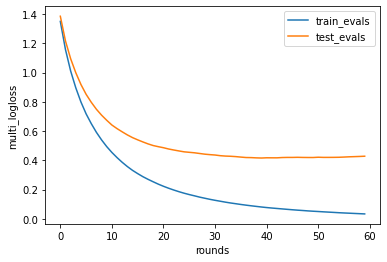

In [12]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('multi_logloss')
plt.xlabel('rounds')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

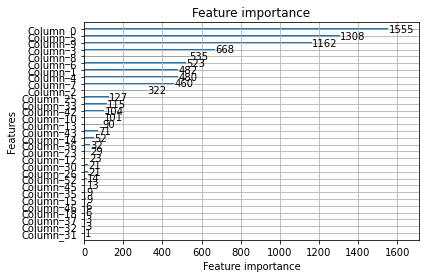

In [13]:
# 绘制模型特征重要性
lightgbm.plot_importance(lgb)

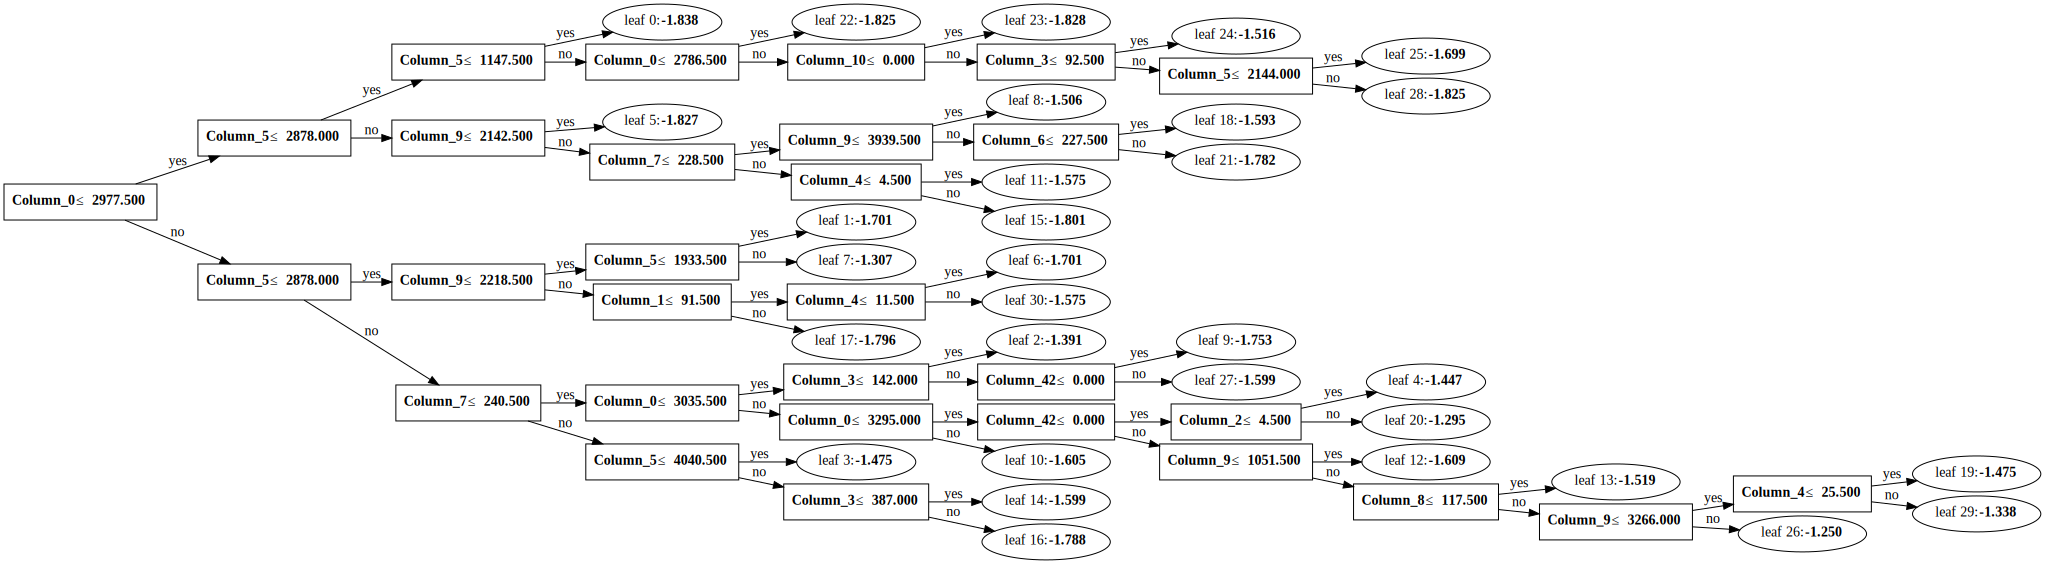

In [18]:
# 可视化lgb分割过程
img = lightgbm.create_tree_digraph(lgb)
img

In [20]:
img.view()


'Digraph.gv.pdf'